<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/AutoencoderFrequencyDomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

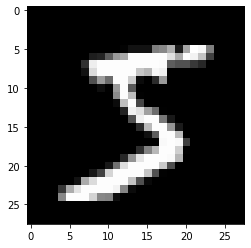

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [ ]:
LATENT_SIZE = 32

In [ ]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")
EPOCHS = 10

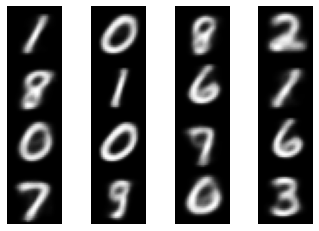

----------- EPOCH 9 -----------
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1953


In [ ]:
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

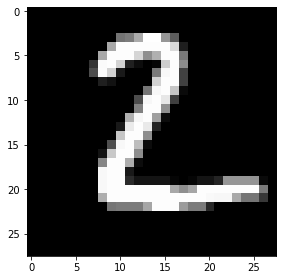

In [ ]:
test_image = x_test[1].reshape(28, 28)
imshow(test_image)

In [ ]:
pred_img = model.predict(test_image.reshape(1, 28, 28))

In [ ]:
dark_image_grey_fourier =[]
image = []

In [ ]:
image.append(test_image)
image.append(pred_img.reshape(28, 28))

In [ ]:
dark_image_grey_fourier.append(np.fft.fftshift(np.fft.fft2(test_image)))
# plt.figure(num=None, figsize=(8, 6), dpi=100)
# plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

In [ ]:
dark_image_grey_fourier.append(np.fft.fftshift(np.fft.fft2(pred_img.reshape(28, 28))))
# plt.figure(num=None, figsize=(8, 6), dpi=100)
# plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

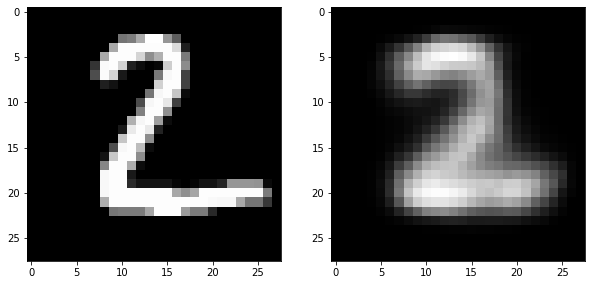

In [ ]:
columns = 2
rows = 1
fig = plt.figure(figsize=(10,10))
for i in range(1, columns*rows + 1):
    img = image[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

Frequency Domain


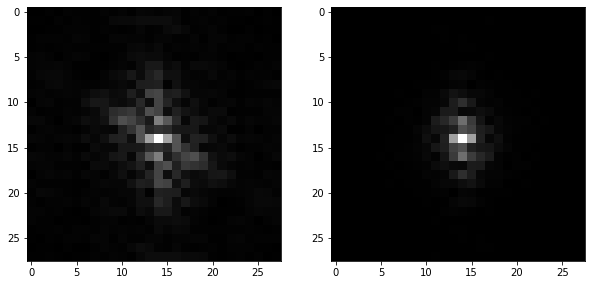

In [ ]:
columns = 2
rows = 1
fig = plt.figure(figsize=(10,10))
for i in range(1, columns*rows + 1):
    img = dark_image_grey_fourier[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow((abs(img)), cmap='gray')
print("Frequency Domain")
plt.show()

Frequency Domain(apply log)


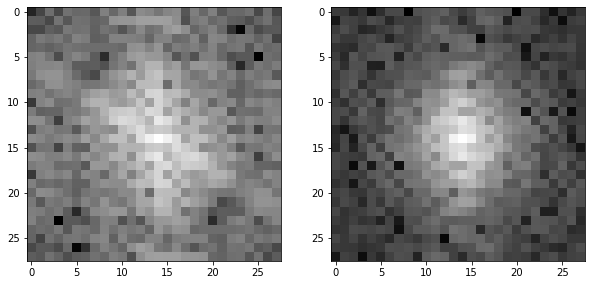

In [ ]:
columns = 2
rows = 1
fig = plt.figure(figsize=(10,10))
for i in range(1, columns*rows + 1):
    img = dark_image_grey_fourier[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.log(abs(img)), cmap='gray')
print("Frequency Domain(apply log)")
plt.show()

In [ ]:
from scipy import spatial

dataSetI = [3, 45, 7, 2]
dataSetII = [2, 54, 13, 15]
result = 1 - spatial.distance.cosine(dark_image_grey_fourier[0], dark_image_grey_fourier[1])

NameError: ignored

In [ ]:
# cosine similarity between A and B
cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
print (f"Cosine Similarity between A and B:{cos_sim}")
print (f"Cosine Distance between A and B:{1-cos_sim}")